In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'Medicine_Details.csv')

In [4]:
df.head(1)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22


In [5]:
df.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [6]:
# Valores únicos
print(df["Medicine Name"].nunique())
print(df["Composition"].nunique())
print(df["Uses"].nunique())
print(df["Manufacturer"].nunique())

11498
3358
712
759


## 1. Cantidad y Porcentajes de Medicamentos por Enfermedades

In [7]:
# Ampliación del diccionario de normalización con infecciones fúngicas
enfermedades_dict = {
    'colon and rectum': 'Colon Cancer',
    'lung cancer': 'Lung Cancer',
    'non-small cell lung cancer': 'Lung Cancer',
    'bacterial infections': 'Bacterial Infections',
    'cough with mucus': 'Cough with Mucus',
    'dry cough': 'Cough',
    'gastroesophageal reflux disease': 'GERD',
    'acid reflux': 'GERD',
    'allergic rhinitis': 'Allergies',
    'sneezing and runny nose': 'Allergies',
    'hypertension': 'Hypertension',
    'high blood pressure': 'Hypertension',
    'breast cancer': 'Breast Cancer',
    'colon cancer': 'Colon Cancer',
    'rectum cancer': 'Colon Cancer',
    'diabetes': 'Diabetes',
    'arthritis': 'Arthritis',
    'anxiety': 'Anxiety',
    'skin conditions': 'Skin Conditions',
    'tuberculosis': 'Tuberculosis',
    'drug-resistant tuberculosis': 'Tuberculosis',
    'fungal infections': 'Fungal Infections',
    'fungal skin infections': 'Fungal Infections',
    'neuropathic pain': 'Neuropathic Pain',
    'peptic ulcer disease': 'Peptic Ulcer Disease',
}

# Función para normalizar enfermedades
def normalizar_enfermedades(uses):
    for variante, normalizado in enfermedades_dict.items():
        if pd.notna(uses) and variante.lower() in uses.lower():
            return normalizado
    return uses 

# Aplicar la normalización
df['Enfermedad'] = df['Uses'].apply(normalizar_enfermedades)


In [9]:
# Conteo de medicamentos por enfermedad normalizada
enfermedades_count = df['Enfermedad'].value_counts().head(15)
enfermedades_count.sum()

6038

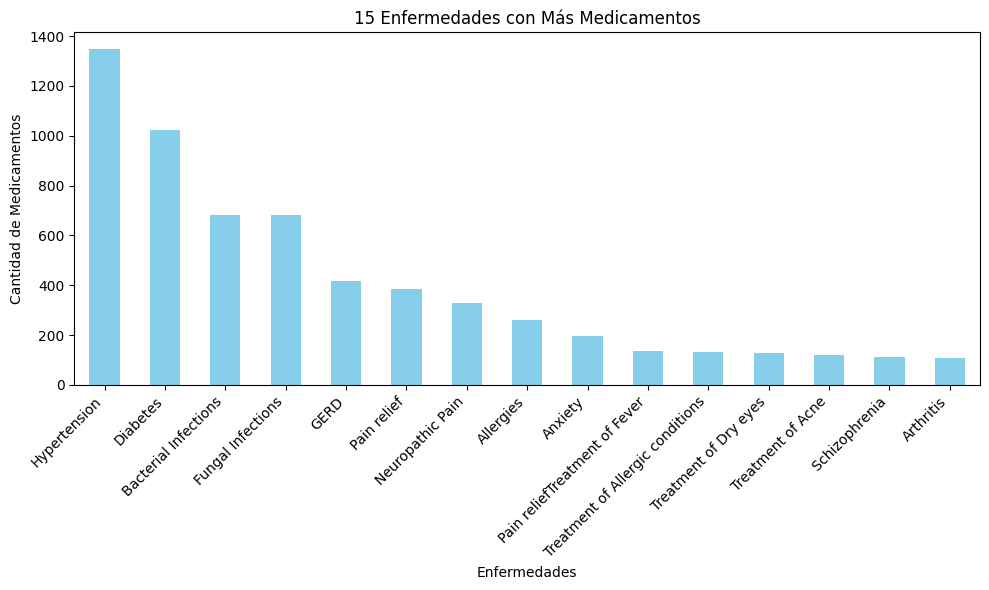

In [51]:
# Crear gráfico de barras con las 15 enfermedades con más medicamentos para su tratamiento.
plt.figure(figsize=(10,6))
enfermedades_count.plot(kind='bar', color='skyblue')
plt.title('15 Enfermedades con Más Medicamentos')
plt.xlabel('Enfermedades')
plt.ylabel('Cantidad de Medicamentos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
# Calcular porcentaje de medicamentos concentrados en las 15 enfermedades anteriores
total_medicamentos = df['Medicine Name'].count()
total_medicamentos_top_15 = enfermedades_count.sum()
porcentaje_top_15_enfermedades = round((total_medicamentos_top_15 / total_medicamentos) * 100, 2)
porcentaje_top_15_enfermedades

51.06

## 4. Cantidad de Medicamentos por Fabricante y su Porcentaje en el Mercado

¿Cuáles son los 20 fabricantes con más medicamentos en el mercado?

In [74]:
# Mostrar el conteo de medicamentos por fabricante
medicamentos_por_fabricante = df["Manufacturer"].value_counts()
print("CONTEO DE MEDICAMENTOS POR FABRICANTE:\n", medicamentos_por_fabricante)

CONTEO DE MEDICAMENTOS POR FABRICANTE:
 Sun Pharmaceutical Industries Ltd    820
Intas Pharmaceuticals Ltd            654
Cipla Ltd                            574
Torrent Pharmaceuticals Ltd          445
Lupin Ltd                            435
                                    ... 
Focaz Medipharma                       1
Anhox Healthcare Pvt Ltd               1
Auftritt Healthcare Pvt Ltd            1
Xena Coronus Health Care Pvt Ltd       1
Austrak Pvt Ltd                        1
Name: Manufacturer, Length: 759, dtype: int64


Número de medicamentos por los 20 principales fabricantes:
Sun Pharmaceutical Industries Ltd    820
Intas Pharmaceuticals Ltd            654
Cipla Ltd                            574
Torrent Pharmaceuticals Ltd          445
Lupin Ltd                            435
Mankind Pharma Ltd                   337
Alkem Laboratories Ltd               327
Zydus Cadila                         327
Macleods Pharmaceuticals Pvt Ltd     319
Abbott                               279
Micro Labs Ltd                       276
Dr Reddy's Laboratories Ltd          266
Ipca Laboratories Ltd                235
Aristo Pharmaceuticals Pvt Ltd       225
Glenmark Pharmaceuticals Ltd         209
Alembic Pharmaceuticals Ltd          167
Leeford Healthcare Ltd               163
Eris Lifesciences Ltd                137
Systopic Laboratories Pvt Ltd        133
USV Ltd                              124
Name: Manufacturer, dtype: int64


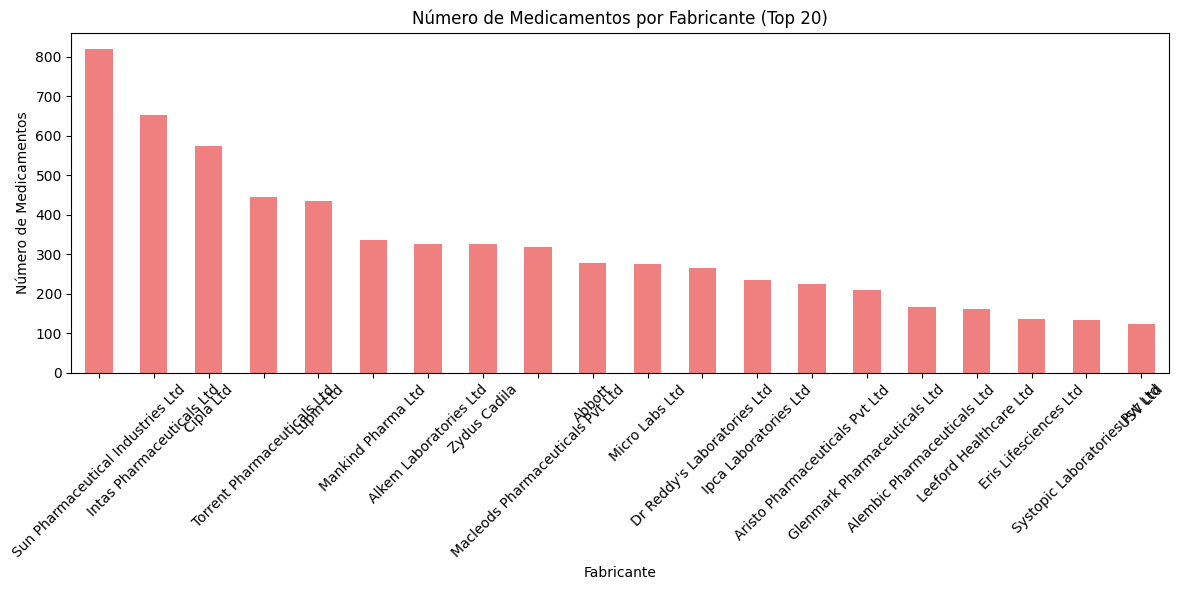

In [75]:
# Ordenar fabricantes por número de medicamentos
medicamentos_ordenados = medicamentos_por_fabricante.sort_values(ascending=False)

# Tomar los 20 principales fabricantes
top_20_fabricantes = medicamentos_ordenados.head(20)

# Mostrar el resultado
print("Número de medicamentos por los 20 principales fabricantes:")
print(top_20_fabricantes)

# Graficar solo los 20 principales fabricantes
plt.figure(figsize=(12, 6))
top_20_fabricantes.plot(kind='bar', color='lightcoral')
plt.title('Número de Medicamentos por Fabricante (Top 20)')
plt.xlabel('Fabricante')
plt.ylabel('Número de Medicamentos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Qué porcentaje representan en el mercado los 20 fabricantes con mayor cantidad de productos?

In [76]:
# Sumar el número de medicamentos de los 20 principales fabricantes
total_top_20 = top_20_fabricantes.sum()

# Sumar el total de medicamentos del dataset
total_medicamentos = medicamentos_por_fabricante.sum()

# Calcular el porcentaje que representan los 20 principales fabricantes
porcentaje_top_20 = (total_top_20 / total_medicamentos) * 100

# Mostrar el resultado
print(f"Los 20 principales fabricantes representan el {porcentaje_top_20:.2f}% del total de medicamentos.")

Los 20 principales fabricantes representan el 54.56% del total de medicamentos.


#### Conclusión: Los **20 principales fabricantes** concentran el **54,56%** del total de medicamentos disponibles en el mercado, lo que evidencia su significativa participación y predominio en la industria farmacéutica.

## 5. Distribución de Frecuencias en las Reseñas - Medicamentos y Fabricantes con Mejores y Peores reseñas

¿Cuál es la distribución de reseñas excelentes, promedio y malas? 

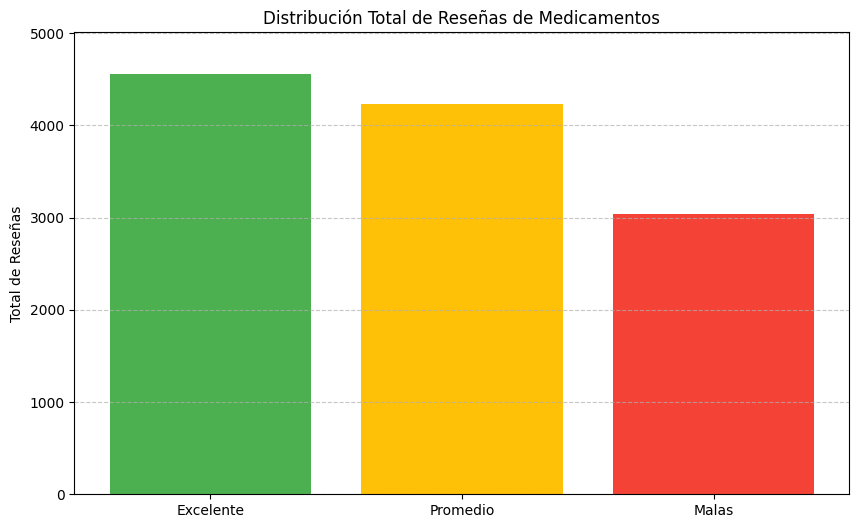

In [65]:
# Calcular los totales para cada tipo de reseña
total_excellent = df['Excellent Review %'].sum()
total_average = df['Average Review %'].sum()
total_poor = df['Poor Review %'].sum()

# Crear un DataFrame para la visualización
review_data = {
    'Tipo de Reseña': ['Excelente', 'Promedio', 'Malas'],
    'Total': [total_excellent, total_average, total_poor]
}
review_df = pd.DataFrame(review_data)

# Crear el gráfico de barras con los totales
plt.figure(figsize=(10, 6))
plt.bar(review_df['Tipo de Reseña'], review_df['Total'], color=['#4CAF50', '#FFC107', '#F44336'])
plt.ylabel('Total de Reseñas')
plt.title('Distribución Total de Reseñas de Medicamentos')
plt.ylim(0, review_df['Total'].max() * 1.1)  # Ajustar el límite superior del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

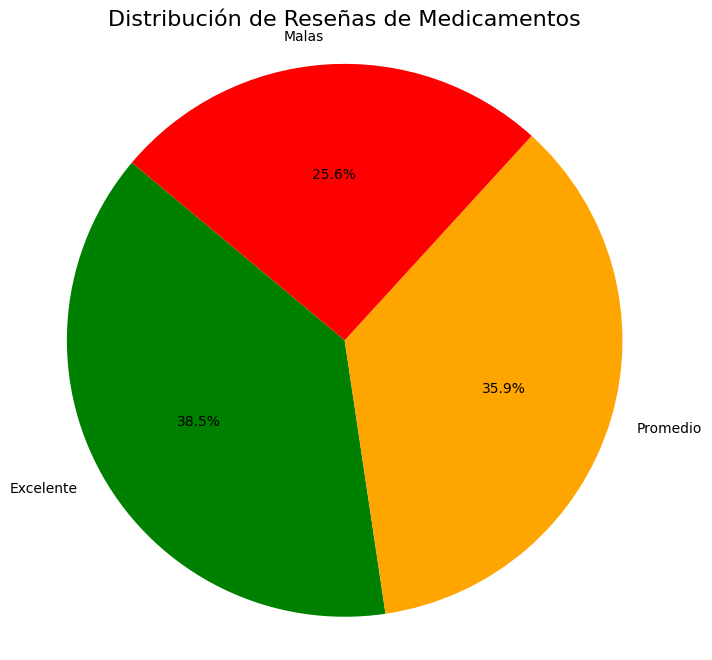

In [66]:
# Datos de la distribución de reseñas
categorias = ['Excelente', 'Promedio', 'Malas']
valores = [4500, 4200, 3000]

# Calcular las proporciones relativas
total = sum(valores)
proporciones = [valor / total for valor in valores]

# Crear el gráfico de tortas
plt.figure(figsize=(8, 8))
plt.pie(proporciones, labels=categorias, autopct='%1.1f%%', startangle=140, colors=['green', 'orange', 'red'])
plt.title('Distribución de Reseñas de Medicamentos', fontsize=16)
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

#### Conclusión: El análisis de las reseñas de medicamentos muestra que el __38.5%__ son clasificadas como **excelentes**, indicando una satisfacción general positiva entre los usuarios. Un __35.9%__ de las reseñas son **promedio**, lo que sugiere áreas de mejora. Sin embargo, el __25.6%__ de reseñas **malas** destaca la necesidad de atención, ya que una cuarta parte de los usuarios no está satisfecha.